In [1]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from warnings import filterwarnings
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/rossco/immunova/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PBMCs').get()

In [3]:
t = Template(texp, '316-01_pbmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.400
...proportion of parent: 0.400
New population: debris
...proportion of total events: 0.600
...proportion of parent: 0.600
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.132
...proportion of parent: 0.329
New population: CD3-
...proportion of total events: 0.268
...proportion of parent: 0.671
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.004
...proportion of parent: 0.033
New population: live
...proportion of total events: 0.127
...proportion of parent: 0.967
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.127
...proportion of parent: 0.998
New population: doublets1
...proportion of total events: 0.000
...proportion of parent: 0.002
-------------

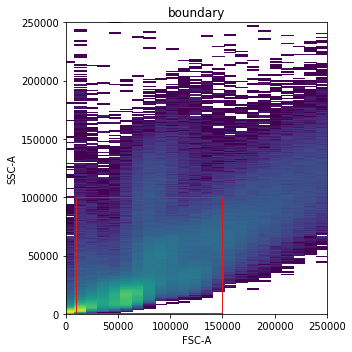

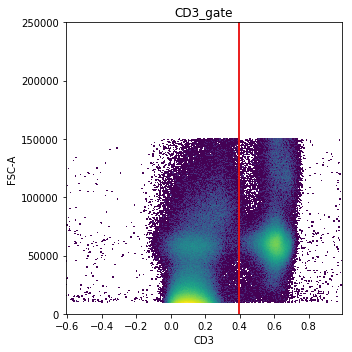

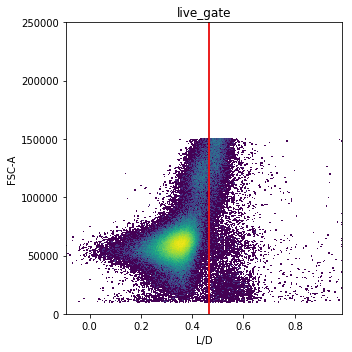

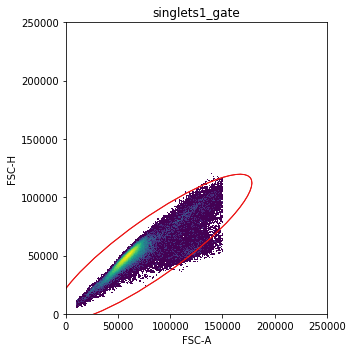

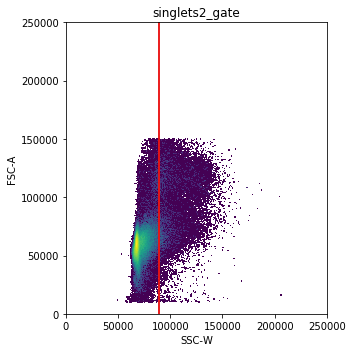

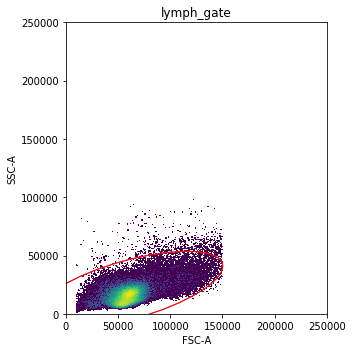

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [6]:
t.remove_population('singlets1')
t.remove_population('doublets1')

------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.112
...proportion of parent: 0.884
New population: doublets1
...proportion of total events: 0.015
...proportion of parent: 0.116
-----------------------


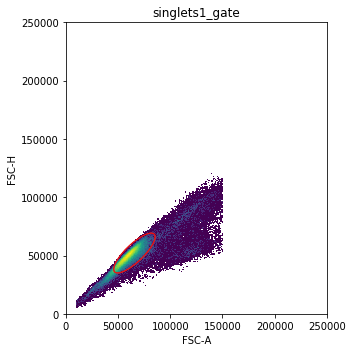

In [8]:
t.apply('singlets1_gate', k=4)

------ singlets2_gate ------
New population: doublets2
...proportion of total events: 0.006
...proportion of parent: 0.052
New population: single_Live_CD3+
...proportion of total events: 0.106
...proportion of parent: 0.948
-----------------------


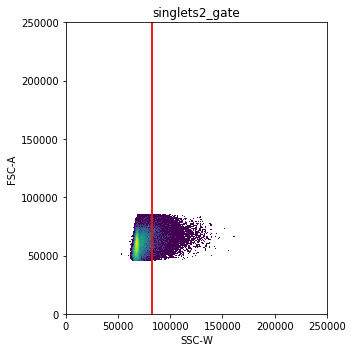

In [9]:
t.apply('singlets2_gate')

------ lymph_gate ------
New population: Lymphocytes
...proportion of total events: 0.106
...proportion of parent: 0.998
New population: other cells
...proportion of total events: 0.000
...proportion of parent: 0.002
-----------------------


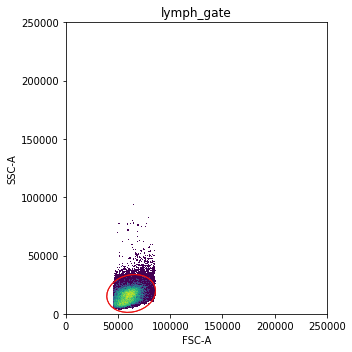

In [10]:
t.apply('lymph_gate')

In [11]:
t.save(overwrite=True)

Saved successfully!


True